In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/16.NiftyOptions/03.HistoricalData/1.OpenInterest')
%run scrape_clientwise_open_interest.py
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/16.NiftyOptions/03.HistoricalData/3.BhavCopy')
%run scrape_bhav_copy.py



In [38]:
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/16.NiftyOptions/03.HistoricalData/3.BhavCopy')
import glob
df_eq=pd.concat([pd.read_csv(x) for x in glob.glob('2.EQ/*APR2018*') if len(open(x,'rb').readlines())>1])
df_eq['TIMESTAMP']=pd.to_datetime(df_eq['TIMESTAMP'].str.title(),format='%d-%b-%Y')
df_eq=df_eq.sort_values(by=['SYMBOL','TIMESTAMP'])
# df_eq=df_eq[df_eq['SYMBOL']=='NIFTY']
df_eq.set_index(['SYMBOL','TIMESTAMP'],inplace=True)
# df_eq['EXPIRY_DT']=pd.to_datetime(df_eq['EXPIRY_DT'].str.title(),format='%d-%b-%Y')


In [24]:
df_eq.head()

SERIES   OPEN  HIGH   LOW  CLOSE   LAST  PREVCLOSE  \
SYMBOL     TIMESTAMP                                                       
20MICRONS  2018-04-02     EQ  49.50  50.9  49.2  49.75  49.95      49.10   
           2018-04-03     EQ  50.00  50.8  49.0  49.90  49.80      49.75   
           2018-04-04     EQ  50.10  52.3  49.0  49.30  49.50      49.90   
           2018-04-06     EQ  50.25  51.1  49.2  49.45  49.40      49.95   
21STCENMGM 2018-04-02     BE  36.30  36.3  35.4  35.40  35.40      35.70   

                       TOTTRDQTY   TOTTRDVAL  TOTALTRADES          ISIN  \
SYMBOL     TIMESTAMP                                                      
20MICRONS  2018-04-02      48947  2446843.35          759  INE144J01027   
           2018-04-03     113830  5681734.00         1006  INE144J01027   
           2018-04-04     193457  9861984.70         1874  INE144J01027   
           2018-04-06      60512  3006601.05          491  INE144J01027   
21STCENMGM 2018-04-02        200     7230.00            8  INE253B01015   

                       Unnamed: 13  
SYMBOL     TIMESTAMP                
20MICRONS  2018-04-02          NaN  
           2018-04-03          NaN  
           2018-04-04          NaN  
           2018-04-06          NaN  
21STCENMGM 2018-04-02          NaN

In [39]:
volumes=df_eq[df_eq['SERIES']=='EQ']['TOTTRDVAL'].unstack()
volumes['CHANGE']=volumes.iloc[:,-1]/volumes.iloc[:,:-1].mean(axis=1)-1
volumes['RANK']=volumes.iloc[:,1].rank(ascending=False)
volumes=volumes[volumes['RANK']<=100]

price_change=df_eq[df_eq['SERIES']=='EQ']['CLOSE'].unstack()
price_change['CHANGE']=price_change.iloc[:,-1]/price_change.iloc[:,:-1].mean(axis=1)-1
volumes['PRICE_CHANGE']=volumes.index.to_series().map(price_change['CHANGE'])

In [40]:
volumes.sort_values(by='CHANGE',ascending=False).head(30).iloc[:,-5:]

TIMESTAMP,2018-04-04 00:00:00,2018-04-06 00:00:00,CHANGE,RANK,PRICE_CHANGE
SYMBOL,,,,,
LUPIN,1.162993e+09,4.581844e+09,1.957703,34.0,0.036889
RCOM,2.364848e+09,4.324603e+09,1.732429,68.0,0.083828
JUBLFOOD,1.643781e+09,4.535839e+09,1.670800,22.0,0.042390
CANBK,1.928828e+09,4.867231e+09,1.557713,25.0,0.077987
BANKINDIA,9.014738e+08,2.166339e+09,1.509731,75.0,0.074414
PNB,2.054422e+09,4.790187e+09,1.478625,18.0,0.070942
MINDTREE,7.901349e+08,2.490770e+09,1.018336,100.0,0.043800
GRAPHITE,1.369757e+09,2.822219e+09,0.945154,43.0,-0.036366
BHARTIARTL,1.447940e+09,3.284414e+09,0.884421,39.0,-0.031450


In [14]:
futures=df_eq[df_eq['INSTRUMENT']=='FUTIDX'].reset_index()
options=df_eq[df_eq['INSTRUMENT']=='OPTIDX'].reset_index()

In [20]:
futures['DAYS_TO_EXPIRY']=(futures['EXPIRY_DT']-futures['TIMESTAMP']).dt.days
futures=futures.sort_values(by=['TIMESTAMP','DAYS_TO_EXPIRY']).drop_duplicates(subset=['TIMESTAMP'])

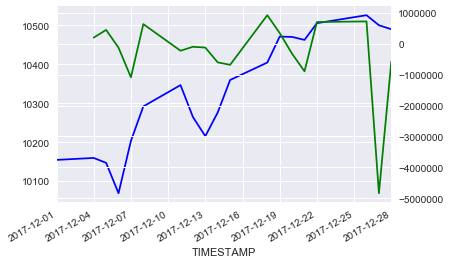

In [31]:
from datetime import date
t1=futures[futures['EXPIRY_DT']==date(2017,12,28)]
t1.set_index('TIMESTAMP',inplace=True)
fig, ax = plt.subplots()
ax3 = ax.twinx()
t1['CLOSE'].plot(ax=ax, style='b-')
t1['CHG_IN_OI'].diff().plot(ax=ax3, style='g-')
